# Integrated Rate Laws

## Motivation

The concentration of reactants as a function of time can tell you the order of the reaction with respect to that reactant.  To understand how this works, we must determine the integrated rate laws.

## Learning Goals

After working through these notes, you should be able to:

1. Derive the first order integrated rate law.
2. Determine the half-life from an integrated rate law.
3. Use integrated rate laws to determine order of reaction.

## Coding Concepts

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## A Rate Law is a Differential Equation

Consider a generic reaction
\begin{equation}
A \rightarrow B
\end{equation}
Suppose this reaction is found to be first order.  In that case we can write
\begin{equation}
v(t) = -\frac{d[A]}{dt} = k[A]
\end{equation}

This equation is a differential equation relating the change in concentration of reactant $A$ with respect to time to the concentration of that species.  

In general, the equating of rate laws and differential rate equations yields a differential equation in the concentration of reactants.  Below we will solve this for first order and provide the results for other orders.

## Integrated Rate Law for First Order Reaction

Here we consider the generic reaction given above and start with the differential equation
\begin{eqnarray}
-\frac{d[A]}{dt} &=& k[A] \\
\Rightarrow d[A] &=& -k[A]dt \\
\Rightarrow \frac{d[A]}{[A]} &=& -kdt
\end{eqnarray}
where in the last step we divided both sides of the equation by $[A]$ to achieve a separation of variables.  We can now ***integrate*** this equation from time $t=0$ and concentration $[A]_0$ to arbitrary time $t$ and concentration $[A]_t$ to yield our first order integrated rate law.
\begin{eqnarray}
\frac{d[A]}{[A]} &=& -kdt \\
\Rightarrow \int_{[A]_0}^{[A]_t}\frac{d[A]}{[A]} &=& -k\int_0^t dt \\
\ln[A]_t - \ln[A]_0 = -kt \\
\Rightarrow \ln[A]_t  = -kt + \ln[A]_0
\end{eqnarray}

This last equality is known as the ***first order integrated rate law***.  It demonstrates that the natural log of concentration will be linear as a function of time for first order processes.  A plot of $\ln[A]$ vs $t$ for a first order process will have a slope if $-k$ and an intercept of $\ln[A]_0$.

The first first order integrated rate law can also be written in the form
\begin{equation}
[A]_t = [A]_0e^{-kt}
\end{equation}

### Half-life for a First Order Process

For a variety of applications, a quantity called ***half-life*** is useful.  This value represents the time is takes for the concentration to be half of the starting concentration.  Equations for half-life can be determined from the integrated rate laws by simply plugging in $[A]_{t_{1/2}} = \frac{1}{2}[A]_0$ and solving for $t_{1/2}$.  The resulting equations will depend on the order of reaction.  

Here we will determine the half-life equation for a first order process based on the first order integrated rate law above
\begin{eqnarray}
\ln[A]_t - \ln[A]_0 &=& -kt \\
\ln\frac{[A]_t}{[A]_0} &=& -kt \\
\Rightarrow \ln\frac{\frac{1}{2}[A]_0}{[A]_0} &=& -kt_{1/2} \\
-\ln2 &=& -kt_{1/2} \\
\Rightarrow t_{1/2} &=& \frac{\ln2}{k}
\end{eqnarray}

An interesting result for half-life of a first order process is that the half-life does not depend on the initial concentration.  Thus, it takes the same amount of time to half the concentration no matter what the starting concentration is.  This result is unique to a first-order process.

Half-lives always depend on the rate constant and are sometimes provided instead of rate constants in problems.

Text(13.862943611198904, -0.02, '$2t_{1/2}$')

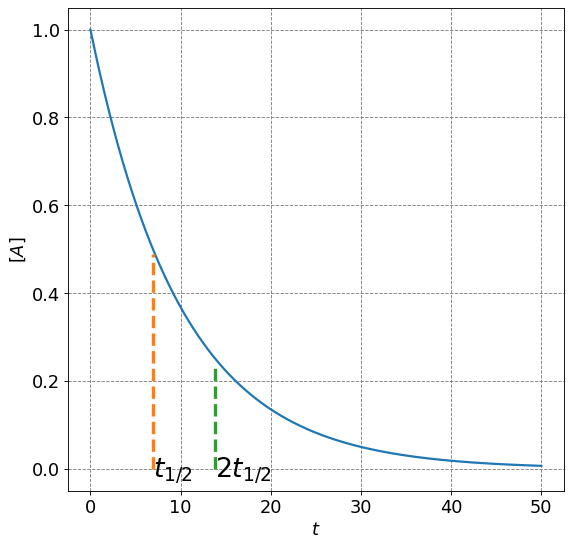

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$t$",size=fontsize)
ax.set_ylabel("$[A]$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
def first_order(t,A0,k):  
    return A0*np.exp(-k*t)
k = 0.1
t = np.arange(0,50,0.01)
A0 = 1
ax.plot(t,first_order(t,A0,k),lw=2)
# Annotations
y = np.arange(0,first_order(np.log(2)/k,A0,k),0.01)
plt.plot(np.ones(y.size)*np.log(2)/k,y,'--',lw=3)
plt.annotate("$t_{1/2}$",(np.log(2)/k,-0.02),fontsize=24)
y = np.arange(0,first_order(2*np.log(2)/k,A0,k),0.01)
plt.plot(np.ones(y.size)*2*np.log(2)/k,y,'--',lw=3)
plt.annotate("$2t_{1/2}$",(2*np.log(2)/k,-0.02),fontsize=24)
#plt.annotate("Liquid",(280,80),fontsize=24)
#plt.annotate("Gas",(280,20),fontsize=24)

## Summary of Integrated Rate Laws

Integrated rate laws for all orders can be derived in a similar manner to the first order derivation above.  Instead of deriving the rest, here we summarize the important results all assuming a generic reaction of the form 
\begin{equation}
A \rightarrow B
\end{equation}

| Order | Linear Integrated Rate Law |   Half Life ($t_{1/2}$)  |
| :---  | :----------------------    | :----------  |
| 0     | $[A]_t = -kt + [A]_0$      | $t_{1/2} = \frac{[A]_0}{2k}$ |
| 1     | $\ln[A]_t  = -kt + \ln[A]_0$      | $t_{1/2} = \frac{\ln2}{k}$ |
| 2     | $\frac{1}{[A]_t}  = kt + \frac{1}{[A]_0}$      | $t_{1/2} = \frac{1}{k[A]_0}$ |

## Order of Reaction Using Integrated Rate Laws

The order of reaction can be estimated using concentration vs time data.  The procedure to do so is to fit the various linear integrated rate laws and choose the one that fits the data the best (has the largest $R^2$ value from the fit).

Here we will use in an example to demonstrate this idea. 

### Example: Order of Reaction from [ ] vs t Data

The hydrolysis of 1-chloro-1-methylcycloundecane ($C_12H_25_Cl$) can be monitored by titrating the result with NaOH to measure the amount of acid present.  The following data of the concentration of NaOH needed to neutralize the reaction as a function of time was measured.  What is the rate of reaction, rate constant for reaction, and what fraction will be left unhydrolyzed after 8hrs?

|    $t/h$    |   x/cm$^3$  |
| :---------- | :---------- |
|   0         |  0.035      |
|   1.0       |  0.295      |
|   3.0       |  0.715      |
|   5.0       |  1.055      |
|   9.0       |  1.505      |
|   12.0      |  1.725      |
| $\infty$    |  2.197      |

**Start by creating data arrays**

We will create data arrays of the concentration of reactant, denoted A, and time, denoted t.  The reactant concentration is equal to the concentration of NaOH needed to neutralize the reaction at infinite time minus the concentration needed at each time.  

In [2]:
import numpy as np
A = np.array([2.197-0.035, 2.197-0.295, 2.197-0.715, 2.197-1.055, 2.197-1.505, 2.197-1.725])
t = np.array([0, 1, 3, 5, 9, 12])

In [3]:
print(A)
print(np.log(A))
print(1/A)

[2.162 1.902 1.482 1.142 0.692 0.472]
[ 0.77103372  0.64290596  0.39339253  0.13278111 -0.36816932 -0.75077629]
[0.46253469 0.52576236 0.67476383 0.87565674 1.44508671 2.11864407]


**Plot [] vs t to check zeroth order**

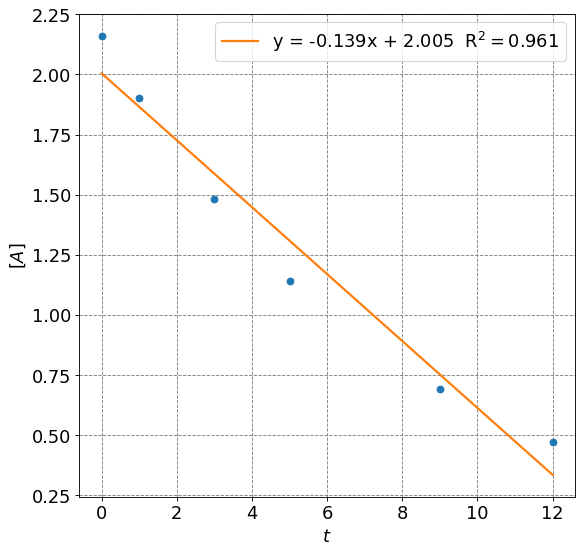

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$t$",size=fontsize)
ax.set_ylabel("$[A]$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot data
plt.plot(t,A,'o')
# fit line
# Manipulate data to perform fit
X = (t).reshape((t.size,1))
# Fit linear model:
reg = LinearRegression().fit(X, A)
label = "y = " + str(np.round(reg.coef_[0],3)) + "x + " + str(np.round(reg.intercept_,3)) + "  R$^2=$" + str(np.round(reg.score(X,A),3)) 
plt.plot(t,reg.predict(X),lw=2, label=label)
plt.legend(fontsize=fontsize)

**Plot ln[] vs t to check first order**

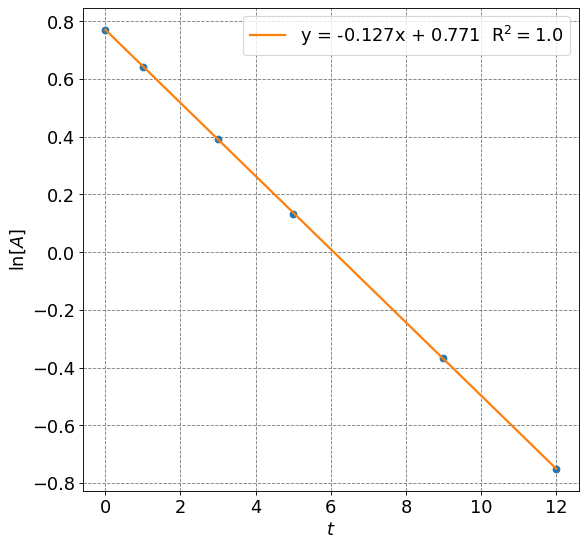

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$t$",size=fontsize)
ax.set_ylabel("$\ln[A]$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot data
plt.plot(t,np.log(A),'o')
# fit line
# Manipulate data to perform fit
X = (t).reshape((t.size,1))
# Fit linear model:
reg = LinearRegression().fit(X, np.log(A))
label = "y = " + str(np.round(reg.coef_[0],3)) + "x + " + str(np.round(reg.intercept_,3)) + "  R$^2=$" + str(np.round(reg.score(X,np.log(A)),3)) 
plt.plot(t,reg.predict(X),lw=2, label=label)
plt.legend(fontsize=fontsize)

**Plot 1/[] vs t to check second order**

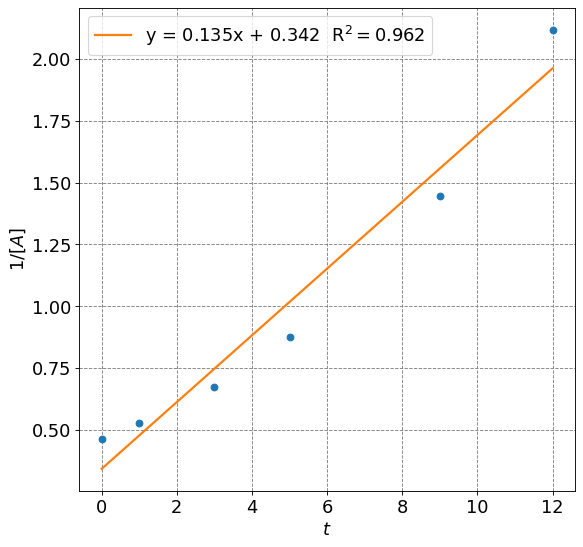

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
# setup plot parameters
fontsize=16
fig = plt.figure(figsize=(8,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("$t$",size=fontsize)
ax.set_ylabel("$1/[A]$",size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot data
plt.plot(t,1/A,'o')
# fit line
# Manipulate data to perform fit
X = (t).reshape((t.size,1))
# Fit linear model:
reg = LinearRegression().fit(X, 1/A)
label = "y = " + str(np.round(reg.coef_[0],3)) + "x + " + str(np.round(reg.intercept_,3)) + "  R$^2=$" + str(np.round(reg.score(X,1/A),3)) 
plt.plot(t,reg.predict(X),lw=2, label=label)
plt.legend(fontsize=fontsize)

If we consider only up to second order, the $R^2$ values for the respective linear fits are 0.961, 1.0, and 0.962 for zeroth, first and second order fits respectively.  Thus, the data is most consistent with the process being first order in reactant.  

The rate constant is negative the slope, so the rate constant is
\begin{equation}
k = 0.127 \text{ hr}^{-1}
\end{equation}

The natural log of concentration of the reactant as a function of time is given as:
\begin{equation}
\ln A = -0.127 t +0.771
\end{equation}
thus, the concentration of reactant at 8 hrs is
\begin{equation}
A(8\text{hrs}) = e^{-0.127\cdot8 +0.771} = 0.784 \text{x/cm}^3
\end{equation}
The fraction unhydrolyzed after 8hrs is thus
\begin{equation}
\frac{0.784}{2.197-0.035} = 0.362
\end{equation}

In [7]:
np.exp(-0.127*8+0.771)

0.7827045382418681

In [8]:
np.exp(-0.127*8+0.771)/(2.197-0.035)

0.3620280010369418